In [227]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fitness = mlrose.FourPeaks(t_pct=0.15)

There is two global maxima : T+1 1 at the beginning and only 0 (or T+1 0 at the end and only 1 otherwise), which produce a fitness of N + (N-N*T).
Two local maximas with only zeros or one : at N

## RHC

Hypothesis : WIth large problem, the RHC will be stuck in a suboptimal place : For each attempt, you will change a bit in the middle of the vector, which will have no influence.

In [237]:
random_seeds = [75 * i for i in range(1, 6)]
import time
size = [3,5,10,20,30,50]
fitness_dic_rhc = {}
fitness_curve_dic_rhc = {}
time_list_rhc = {}
for s in size:
    print('size :', s)
    time_list_rhc[s] = []
    fitness_list = []
    T = np.ceil(0.15 * s)
    print('Local optima fitness :',s)
    print('Global optima fitness :', s + s -  T - 1)
    
    print('\n')
    
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
    
        
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True, random_state=random_state,max_attempts = s * 5)
        print('best_fitness :', best_fitness)
        time_list_rhc[s].append(time.time() - start_time)
        fitness_list.append(best_fitness)
        fitness_dic_rhc[s] = fitness_list
        fitness_curve_dic_rhc[(s,random_state)] = fitness_curve
    print('\n')

size : 3
Local optima fitness : 3
Global optima fitness : 4.0


best_fitness : 3.0
best_fitness : 3.0
best_fitness : 3.0
best_fitness : 3.0
best_fitness : 3.0


size : 5
Local optima fitness : 5
Global optima fitness : 8.0


best_fitness : 8.0
best_fitness : 8.0
best_fitness : 8.0
best_fitness : 8.0
best_fitness : 8.0


size : 10
Local optima fitness : 10
Global optima fitness : 17.0


best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 10.0


size : 20
Local optima fitness : 20
Global optima fitness : 36.0


best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0


size : 30
Local optima fitness : 30
Global optima fitness : 54.0


best_fitness : 30.0
best_fitness : 30.0
best_fitness : 54.0
best_fitness : 54.0
best_fitness : 54.0


size : 50
Local optima fitness : 50
Global optima fitness : 91.0


best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0




We see that when we increase the problem size, the RHC will converge more often toward the local minima. To acheive this, we need to set a minimum number of attempts proportional to the problem size. Nb, the larger the problem, the larger the number of attempts (as a proportion of ) needed to converge toward the local minima.

In [164]:
random_seeds = [75 * i for i in range(1, 6)]
import time
s = 100
max_attempts = [0.5,1,2,3,5,10,50]
fitness_dic_rhc = {}
fitness_curve_dic_rhc = {}
time_list_rhc = {}
for m in max_attempts:
    print('max_attempts :', m)
    time_list_rhc[s] = []
    fitness_list = []
    T = np.ceil(0.15 * s)
    print('Local optima fitness :',s)
    print('Global optima fitness :', s + s -  T - 1)
    
    print('\n')
    
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
    
        
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True, random_state=random_state,max_attempts = s*m)
        print('best_fitness :', best_fitness)
        time_list_rhc[s].append(time.time() - start_time)
        fitness_list.append(best_fitness)
        fitness_dic_rhc[s] = fitness_list
        fitness_curve_dic_rhc[(s,random_state)] = fitness_curve
    print('\n')

max_attempts : 0.5
Local optima fitness : 100
Global optima fitness : 184.0


best_fitness : 7.0
best_fitness : 4.0
best_fitness : 3.0
best_fitness : 4.0
best_fitness : 2.0


max_attempts : 1
Local optima fitness : 100
Global optima fitness : 184.0


best_fitness : 7.0
best_fitness : 6.0
best_fitness : 7.0
best_fitness : 9.0
best_fitness : 3.0


max_attempts : 2
Local optima fitness : 100
Global optima fitness : 184.0


best_fitness : 31.0
best_fitness : 19.0
best_fitness : 17.0
best_fitness : 14.0
best_fitness : 8.0


max_attempts : 3
Local optima fitness : 100
Global optima fitness : 184.0


best_fitness : 46.0
best_fitness : 19.0
best_fitness : 100.0
best_fitness : 23.0
best_fitness : 8.0


max_attempts : 5
Local optima fitness : 100
Global optima fitness : 184.0


best_fitness : 100.0
best_fitness : 79.0
best_fitness : 100.0
best_fitness : 100.0
best_fitness : 43.0


max_attempts : 10
Local optima fitness : 100
Global optima fitness : 184.0


best_fitness : 100.0
best_fitness : 100

In [146]:
size = 100
problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)

best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True, max_attempts= size * 5, random_state=75)

In [147]:
T = np.ceil(0.15 * size)
print('Local optima fitness :',size)
print('Global optima fitness :', size + size -  T - 1)

print('Best fitness :', best_fitness)


Local optima fitness : 100
Global optima fitness : 184.0
Best fitness : 100.0


Below we run the algorithm for the size of interest

In [249]:
random_seeds = [75 * i for i in range(1, 6)]
import time
size = [10,20,50,100]
fitness_dic_rhc = {}
fitness_curve_dic_rhc = {}
time_list_rhc = {}
for s in size:
    print('size :', s)
    time_list_rhc[s] = []
    fitness_list = []
    T = np.ceil(0.15 * s)
    print('Local optima fitness :',s)
    print('Global optima fitness :', s + s -  T - 1)
    
    print('\n')
    
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
    
        
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True, random_state=random_state,max_attempts = s*7, restarts=10)
        print('best_fitness :', best_fitness)
        time_list_rhc[s].append(time.time() - start_time)
        fitness_list.append(best_fitness)
        fitness_dic_rhc[s] = fitness_list
        fitness_curve_dic_rhc[(s,random_state)] = fitness_curve
    print('\n')

size : 10
Local optima fitness : 10
Global optima fitness : 17.0


best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0


size : 20
Local optima fitness : 20
Global optima fitness : 36.0


best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 20.0


size : 50
Local optima fitness : 50
Global optima fitness : 91.0


best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0


size : 100
Local optima fitness : 100
Global optima fitness : 184.0


best_fitness : 100.0
best_fitness : 100.0
best_fitness : 100.0
best_fitness : 100.0
best_fitness : 100.0




## Simulated annealing

We test the influence of different decay

For all kind of decay, we have better results when the temperature decreases as slowly as possible. Which makes sense as the SA algorithm is designed to be able to not get stuck in local minima.

In [183]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [50]

exp_decay = [5e-1,5e-2,5e-3,5e-4,5e-5,5e-6,5e-7]
geom_decay = [0.9,0.99,0.999,0.9999,0.99999,0.5]
arith_decay = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]

decay = [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]
match_decay = ['ExpDecay','GeomDecay','ArithDecay']
grid_search_sa = {}


for size in problem_size:
    
    print('size :', size)
    
    T = np.ceil(0.15 * size)
    print('Local optima fitness :',size)
    print('Global optima fitness :', size + size -  T - 1)
    
    
    
    for decay in match_decay:
        if decay == 'ExpDecay':
            decay_list = exp_decay
        elif decay == 'GeomDecay':
            decay_list = geom_decay
        elif decay == 'ArithDecay':
            decay_list = arith_decay
        
        for d in decay_list:
            fitness_list = []
            
            if decay == 'ExpDecay':
                schedule = mlrose.ExpDecay(init_temp=1, exp_const=d)
                
            elif decay == 'GeomDecay':
                schedule = mlrose.GeomDecay(init_temp=1, decay=d)
                
            elif decay == 'ArithDecay':
                schedule = mlrose.ArithDecay(init_temp=1, decay=d)
                
            print('decay :', decay,d)
            
            for random_state in random_seeds:
                problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
                best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=size*3,  curve=True, random_state=random_state)
                fitness_list.append(best_fitness)
                print('best_fitness :', best_fitness)
            grid_search_sa[(size,decay,d)] = np.sum(fitness_list)
            print('\n')

size : 50
Local optima fitness : 50
Global optima fitness : 91.0
decay : ExpDecay 0.5
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0


decay : ExpDecay 0.05
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0


decay : ExpDecay 0.005
best_fitness : 50.0
best_fitness : 91.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0


decay : ExpDecay 0.0005
best_fitness : 91.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 50.0
best_fitness : 91.0


decay : ExpDecay 5e-05
best_fitness : 90.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 49.0
best_fitness : 91.0


decay : ExpDecay 5e-06
best_fitness : 90.0
best_fitness : 49.0
best_fitness : 91.0
best_fitness : 50.0
best_fitness : 50.0


decay : ExpDecay 5e-07
best_fitness : 90.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 50.0
best_fitness : 50.0


decay : GeomDecay 0.9
best_fitness : 50.0
best_fitness : 50.0


Here we do the grid search for various size.

In [179]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [10,20,50,100]

exp_decay = [5e-1,5e-2,5e-3,5e-4,5e-5,5e-6,5e-7]
geom_decay = [0.9,0.99,0.999,0.9999,0.99999,0.5]
arith_decay = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]

decay = [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]
match_decay = ['ExpDecay','GeomDecay','ArithDecay']
grid_search_sa = {}


for size in problem_size:
    
    
    
 
    
    
    
    for decay in match_decay:
        if decay == 'ExpDecay':
            decay_list = exp_decay
        elif decay == 'GeomDecay':
            decay_list = geom_decay
        elif decay == 'ArithDecay':
            decay_list = arith_decay
        
        for d in decay_list:
            fitness_list = []
            
            if decay == 'ExpDecay':
                schedule = mlrose.ExpDecay(init_temp=1, exp_const=d)
                
            elif decay == 'GeomDecay':
                schedule = mlrose.GeomDecay(init_temp=1, decay=d)
                
            elif decay == 'ArithDecay':
                schedule = mlrose.ArithDecay(init_temp=1, decay=d)
                
            
            
            for random_state in random_seeds:
                problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
                best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=size*10,  curve=True, random_state=random_state)
                fitness_list.append(best_fitness)
                
            grid_search_sa[(size,decay,d)] = np.sum(fitness_list)
            

In [181]:
#for each size, print the argmax of grid search
for size in problem_size:
    val = -np.inf
    for decay in match_decay:
        if decay == 'ExpDecay':
            decay_list = exp_decay
        elif decay == 'GeomDecay':
            decay_list = geom_decay
        elif decay == 'ArithDecay':
            decay_list = arith_decay
            
        for d in decay_list:
            if grid_search_sa[(size,decay,d)] > val:
                val = grid_search_sa[(size,decay,d)]
                best = (decay,d)
    
    print("For size {}, the best parameters are {} with a fitness of {}".format(size,best,val))

For size 10, the best parameters are ('ExpDecay', 0.0005) with a fitness of 85.0
For size 20, the best parameters are ('ExpDecay', 5e-05) with a fitness of 180.0
For size 50, the best parameters are ('ExpDecay', 5e-07) with a fitness of 455.0
For size 100, the best parameters are ('GeomDecay', 0.99999) with a fitness of 584.0


Quand la taille du problème grandit, le decay devient moins important. En effet, plus le problème est grand, plus il est difficile de trouver le bon optimum. Il faut donc plus de temps pour trouver le bon optimum. On peut donc se permettre de faire un decay plus lent.

Below I run the SA annealing with the best parameters for the size of interest

In [185]:
random_seeds = [75 * i for i in range(1, 6)]

size = [10,20,50,100]
schedule_list = [mlrose.ExpDecay(exp_const= 0.0005), mlrose.ExpDecay(exp_const=5e-05), mlrose.ExpDecay(exp_const=5e-07),mlrose.GeomDecay(decay= 0.99999)]

fitness_dic_sa = {}
fitness_curve_dic_sa = {}
time_list_sa = {}
for s,schedule in zip(size,schedule_list):
    time_list_sa[s] = []
    fitness_list = []
    
    print('size :', s)
    
    T = np.ceil(0.15 * s)
    print('Local optima fitness :',s)
    print('Global optima fitness :', s + s -  T - 1)
    
    
    
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts= s * 10, curve=True, random_state=random_state)
        
        time_list_sa[s].append(time.time() - start_time)
        print('best_fitness :', best_fitness)
        fitness_list.append(best_fitness)
        fitness_dic_sa[s] = fitness_list
        fitness_curve_dic_sa[(s,random_state)] = fitness_curve
    print('\n')

size : 10
Local optima fitness : 10
Global optima fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0


size : 20
Local optima fitness : 20
Global optima fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0


size : 50
Local optima fitness : 50
Global optima fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0


size : 100
Local optima fitness : 100
Global optima fitness : 184.0
best_fitness : 100.0
best_fitness : 100.0
best_fitness : 100.0
best_fitness : 184.0
best_fitness : 100.0




## Genetic algorithm

I first the test the importance of the mutation_prob parameter

In [193]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [10,20,50,100]

mutation_prob = [0.1,0.2,0.3,0.4,0.5]
#pop_breed_percent = [0.25,0.5,0.75]
pbp = 0.75
grid_search_ga = {}
grid_search_ga_iter = {}

for size in problem_size:
    
    print('size :', size)
    
    T = np.ceil(0.15 * size)
    print('Local optima fitness :',size)
    print('Global optima fitness :', size + size -  T - 1)
    
    
    
    
    
    for mp in mutation_prob:
        
        print('mutation_prob :', mp)
        #for pbp in pop_breed_percent:
        fitness_list = []
        iter = []
        
        for random_state in random_seeds:
            problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
            
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, mutation_prob=mp,pop_breed_percent= pbp, max_attempts=size * 0.5, curve=True, random_state=random_state)
            print('best_fitness :', best_fitness)
            fitness_list.append(best_fitness)
            iter.append(len(fitness_curve))
        print('mean iter :', np.mean(iter))
        print("\n")
        grid_search_ga[(size,mp,pbp)] = np.mean(fitness_list)/size
        grid_search_ga_iter[(size,mp,pbp)] = np.mean(iter)

size : 10
Local optima fitness : 10
Global optima fitness : 17.0
mutation_prob : 0.1
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
mean iter : 6.4


mutation_prob : 0.2
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
mean iter : 6.2


mutation_prob : 0.3
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
mean iter : 6.2


mutation_prob : 0.4
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
mean iter : 6.2


mutation_prob : 0.5
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
mean iter : 6.2


size : 20
Local optima fitness : 20
Global optima fitness : 36.0
mutation_prob : 0.1
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
mean iter : 20.0


mutation_prob : 0.2
best_fitness : 36.0
b

In [204]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [10,20,50,100]

#mutation_prob = [0.1,0.2,0.3,0.4,0.5]
pop_breed_percent = [0.25,0.5,0.75]
mp = 0.2
grid_search_ga = {}
grid_search_ga_iter = {}

for size in problem_size:
    
    print('size :', size)
    
    T = np.ceil(0.15 * size)
    print('Local optima fitness :',size)
    print('Global optima fitness :', size + size -  T - 1)
    
    
    
    
    
    for pbp in pop_breed_percent:
        
        print('pop_breed_percent :', pbp)
        #for pbp in pop_breed_percent:
        fitness_list = []
        iter = []
       
        
        for random_state in random_seeds:
            problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
            
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200,mutation_prob=mp,pop_breed_percent= pbp, max_attempts=size * 0.5, curve=True, random_state=random_state)
            print('best_fitness :', best_fitness)
            fitness_list.append(best_fitness)
            iter.append(len(fitness_curve))
            
        print('mean fevals :', np.mean(fevals))
        print('mean iter :', np.mean(iter))
        print("\n")
        grid_search_ga[(size,mp,pbp)] = np.mean(fitness_list)/size
        grid_search_ga_iter[(size,mp,pbp)] = np.mean(iter)

size : 10
Local optima fitness : 10
Global optima fitness : 17.0
pop_breed_percent : 0.25
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
mean fevals : 53738.75
mean iter : 6.8


pop_breed_percent : 0.5
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
mean fevals : 53738.75
mean iter : 6.4


pop_breed_percent : 0.75
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
mean fevals : 53738.75
mean iter : 6.2


size : 20
Local optima fitness : 20
Global optima fitness : 36.0
pop_breed_percent : 0.25
best_fitness : 34.0
best_fitness : 33.0
best_fitness : 30.0
best_fitness : 30.0
best_fitness : 34.0
mean fevals : 53738.75
mean iter : 22.2


pop_breed_percent : 0.5
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
mean fevals : 53738.75
mean iter : 24.6


pop_breed_percent : 0.75
best_fitness : 

Quand Pop Bree percent augmente, le nombre d'itérations moyenne diminue.

NB : Increasing the pop size helps the algorithm to converge towards the global optima : with pop size = 200, the alorithm converges towards the local minima, but when you increase pop size to 800 it converge toward the global minima.

In [205]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [50,100]

#mutation_prob = [0.1,0.2,0.3,0.4,0.5]
#pop_breed_percent = [0.25,0.5,0.75]
mp = 0.2
pbp = 0.75
pop_size = [200,400,600,800]
grid_search_ga = {}
grid_search_ga_iter = {}

for size in problem_size:
    
    print('size :', size)
    
    T = np.ceil(0.15 * size)
    print('Local optima fitness :',size)
    print('Global optima fitness :', size + size -  T - 1)
    
    
    
    
    
    for p in pop_size:
        
        print('pop size :', p)
        #for pbp in pop_breed_percent:
        fitness_list = []
        iter = []
        fevals = []
        
        
        for random_state in random_seeds:
            problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
            
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=p,mutation_prob=0.2,pop_breed_percent= pbp, max_attempts=size * 0.5, curve=True, random_state=random_state)
            print('best_fitness :', best_fitness)
            fitness_list.append(best_fitness)
            iter.append(len(fitness_curve))
            fevals.append(fitness_curve[-1,1])
        print('mean fevals :', np.mean(fevals))
        print('mean iter :', np.mean(iter))
        print("\n")
        grid_search_ga[(size,mp,pbp)] = np.mean(fitness_list)/size
        grid_search_ga_iter[(size,mp,pbp)] = np.mean(iter)

size : 50
Local optima fitness : 50
Global optima fitness : 91.0
pop size : 200
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
mean fevals : 21325.6
mean iter : 105.0


pop size : 400
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
mean fevals : 33380.6
mean iter : 82.2


pop size : 600
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
mean fevals : 46294.4
mean iter : 76.0


pop size : 800
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
mean fevals : 60250.2
mean iter : 74.2


size : 100
Local optima fitness : 100
Global optima fitness : 184.0
pop size : 200
best_fitness : 100.0
best_fitness : 100.0
best_fitness : 184.0
best_fitness : 100.0
best_fitness : 100.0
mean fevals : 63154.8
mean iter : 313.0


pop size : 400
best_fitness : 184.0
best_fitness : 100.0
best_fitness : 100.0
be

Ga algorithm with "best" parameters 

In [207]:
random_seeds = [75 * i for i in range(1, 6)]

size = [10,20,50,100]

fitness_dic_ga = {}
fitness_curve_dic_ga = {}
time_list_ga = {}
for s in size:
    time_list_ga[s] = []
    fitness_list = []
    
    print('size :', s)
    
    T = np.ceil(0.15 * s)
    print('Local optima fitness :',s)
    print('Global optima fitness :', s + s -  T - 1)
    
   
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=s, fitness_fn=fitness, maximize=True, max_val=2)
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem,pop_size= 800 if s == 100 else 200, mutation_prob= 0.2, max_attempts= s * 0.5, curve=True, random_state=random_state)
        
        time_list_ga[s].append(time.time() - start_time)
        
        fitness_list.append(best_fitness)
        print('best_fitness :', best_fitness)
        
        fitness_dic_ga[s] = fitness_list
        fitness_curve_dic_ga[(s,random_state)] = fitness_curve
    print('\n')

size : 10
Local optima fitness : 10
Global optima fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0


size : 20
Local optima fitness : 20
Global optima fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0
best_fitness : 36.0


size : 50
Local optima fitness : 50
Global optima fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0
best_fitness : 91.0


size : 100
Local optima fitness : 100
Global optima fitness : 184.0
best_fitness : 184.0
best_fitness : 184.0
best_fitness : 184.0
best_fitness : 184.0
best_fitness : 100.0




# Mimic

In [250]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [10,20,50,100]

keep_percent = [0.1,0.2,0.3,0.4]
pop_size = [50,100,200]

grid_search_mimic = {}
grid_search_mimic_iter = {}


for size in problem_size:
    print(size)
    for kp in keep_percent:
        for pop_s in pop_size:
            fitness_list = []
            iter = []
            
            for random_state in random_seeds:
                
                problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
                problem.set_mimic_fast_mode(True)
                
                best_state, best_fitness, fitness_curve = mlrose.mimic(problem, keep_pct=kp,pop_size= pop_s, curve=True, random_state=random_state)
                fitness_list.append(best_fitness)
                iter.append(len(fitness_curve))
            grid_search_mimic[(size,kp,pop_s)] = np.sum(fitness_list)
            grid_search_mimic_iter[(size,kp,pop_s)] = np.mean(iter)

10
20
50
100


In [251]:
for size in problem_size:
    val = -np.inf
    for kp in keep_percent:
        for pop_s in pop_size:
            if grid_search_mimic[(size,kp,pop_s)] > val:
                val = grid_search_mimic[(size,kp,pop_s)]
                best = (kp,pop_s)
            
        
    
    print("For size {}, the best parameters are {} with a fitness of {}".format(size,best,val))

For size 10, the best parameters are (0.1, 200) with a fitness of 85.0
For size 20, the best parameters are (0.3, 200) with a fitness of 178.0
For size 50, the best parameters are (0.2, 200) with a fitness of 353.0
For size 100, the best parameters are (0.3, 200) with a fitness of 142.0


In [276]:
random_seeds = [75 * i for i in range(1, 6)]

problem_size = [10,20,50,100]

fitness_dic_mimic = {}
fitness_curve_dic_mimic = {}
time_list_mimic = {}


for size in problem_size:
    time_list_mimic[size] = []
    fitness_list = []
    
    print('size :', size)
    
    T = np.ceil(0.15 * size)
    print('Local optima fitness :',size)
    print('Global optima fitness :', size + size -  T - 1)
    
    for random_state in random_seeds:
        problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness,maximize=True, max_val=2)
        problem.set_mimic_fast_mode(True)
        start_time = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(problem, curve=True, random_state=random_state,pop_size=200 if size < 100 else 800,max_attempts= size * 0.8,keep_pct=0.2)
        
        time_list_mimic[size].append(time.time() - start_time)
        fitness_list.append(best_fitness)
        print('best_fitness :', best_fitness)
        fitness_dic_mimic[size] = fitness_list
        fitness_curve_dic_mimic[(size,random_state)] = fitness_curve
    print('\n')
        
   

size : 10
Local optima fitness : 10
Global optima fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0
best_fitness : 17.0


size : 20
Local optima fitness : 20
Global optima fitness : 36.0
best_fitness : 35.0
best_fitness : 35.0
best_fitness : 36.0
best_fitness : 34.0
best_fitness : 36.0


size : 50
Local optima fitness : 50
Global optima fitness : 91.0
best_fitness : 67.0
best_fitness : 79.0
best_fitness : 75.0
best_fitness : 68.0
best_fitness : 65.0


size : 100
Local optima fitness : 100
Global optima fitness : 184.0
best_fitness : 133.0
best_fitness : 141.0
best_fitness : 124.0
best_fitness : 138.0
best_fitness : 51.0




In [ ]:
random_seeds = [75 * i for i in range(1, 6)]
problem_size = [50,100,150]

keep_percent = [0.1,0.2,0.3,0.4]
pop_size = [50,100,200]

grid_search_mimic = {}
grid_search_mimic_iter = {}


for size in problem_size:
    print(size)
    for kp in keep_percent:
        for pop_s in pop_size:
            fitness_list = []
            iter = []
            
            for random_state in random_seeds:
                
                problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
                problem.set_mimic_fast_mode(True)
                
                best_state, best_fitness, fitness_curve = mlrose.mimic(problem, keep_pct=kp,pop_size= pop_s, curve=True, random_state=random_state)
                fitness_list.append(best_fitness)
                iter.append(len(fitness_curve))
                grid_search_mimic[(size,kp,pop_s)] = np.mean(fitness_list)/size
                grid_search_mimic_iter[(size,kp,pop_s)] = np.mean(iter)
 

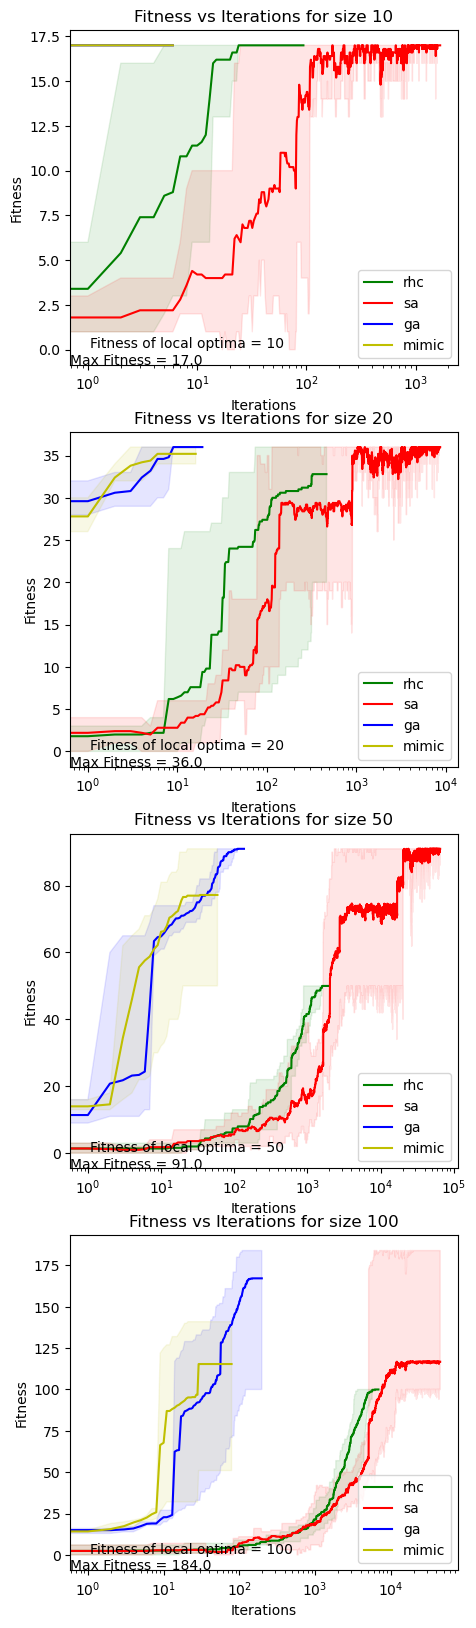

In [265]:
fig, ax = plt.subplots(4, 1, figsize=(5, 20))
for size,_ in zip([10,20,50,100],[0,1,2,3]):
    mean_fitness_rhc = []
    max_fitness_rhc = []
    min_fitness_rhc = []

    length1 = len(fitness_curve_dic_rhc[(size,75)])
    length2 = len(fitness_curve_dic_rhc[(size,150)])
    length3 = len(fitness_curve_dic_rhc[(size,225)])
    length4 = len(fitness_curve_dic_rhc[(size,300)])
    length5 = len(fitness_curve_dic_rhc[(size,375)])

    l_rhc_min = min(length1,length2,length3,length4,length5)
    l_rhc_max = max(length1,length2,length3,length4,length5)

    for i in range(l_rhc_min):
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][0]
        
        mean_fitness_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_rhc_min,l_rhc_max):
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][0] if i < length1 else fitness_curve_dic_rhc[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][0] if i < length2 else fitness_curve_dic_rhc[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][0] if i < length3 else fitness_curve_dic_rhc[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][0] if i < length4 else fitness_curve_dic_rhc[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][0] if i < length5 else fitness_curve_dic_rhc[(size,375)][length5-1][0]
        
        mean_fitness_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
        
    mean_fitness_sa = []
    max_fitness_sa = []
    min_fitness_sa = []

    length1 = len(fitness_curve_dic_sa[(size,75)])
    length2 = len(fitness_curve_dic_sa[(size,150)])
    length3 = len(fitness_curve_dic_sa[(size,225)])
    length4 = len(fitness_curve_dic_sa[(size,300)])
    length5 = len(fitness_curve_dic_sa[(size,375)])

    l_sa_min = min(length1,length2,length3,length4,length5)
    l_sa_max = max(length1,length2,length3,length4,length5)

    for i in range(l_sa_min):
        
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][0]
        

        mean_fitness_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_sa_min,l_sa_max):
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][0] if i < length1 else fitness_curve_dic_sa[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][0] if i < length2 else fitness_curve_dic_sa[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][0] if i < length3 else fitness_curve_dic_sa[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][0] if i < length4 else fitness_curve_dic_sa[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][0] if i < length5 else fitness_curve_dic_sa[(size,375)][length5-1][0]
        
        mean_fitness_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    mean_fitness_ga = []
    max_fitness_ga = []
    min_fitness_ga = []

    length1 = len(fitness_curve_dic_ga[(size,75)])
    length2 = len(fitness_curve_dic_ga[(size,150)])
    length3 = len(fitness_curve_dic_ga[(size,225)])
    length4 = len(fitness_curve_dic_ga[(size,300)])
    length5 = len(fitness_curve_dic_ga[(size,375)])

    l_ga_min = min(length1,length2,length3,length4,length5)
    l_ga_max = max(length1,length2,length3,length4,length5)

    for i in range(l_ga_min):
        
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][0]
        

        mean_fitness_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
    
    for i in range(l_ga_min,l_ga_max):
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][0] if i < length1 else fitness_curve_dic_ga[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][0] if i < length2 else fitness_curve_dic_ga[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][0] if i < length3 else fitness_curve_dic_ga[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][0] if i < length4 else fitness_curve_dic_ga[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][0] if i < length5 else fitness_curve_dic_ga[(size,375)][length5-1][0]
        
        mean_fitness_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    mean_fitness_mimic = []
    max_fitness_mimic = []
    min_fitness_mimic = []

    length1 = len(fitness_curve_dic_mimic[(size,75)])
    length2 = len(fitness_curve_dic_mimic[(size,150)])
    length3 = len(fitness_curve_dic_mimic[(size,225)])
    length4 = len(fitness_curve_dic_mimic[(size,300)])
    length5 = len(fitness_curve_dic_mimic[(size,375)])

    l_mimic_min = min(length1,length2,length3,length4,length5)
    l_mimic_max = max(length1,length2,length3,length4,length5)

    for i in range(l_mimic_min):
        
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][0]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][0]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][0]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][0]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][0]
        

        mean_fitness_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_mimic_min,l_mimic_max):
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][0] if i < length1 else fitness_curve_dic_mimic[(size,75)][length1-1][0]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][0] if i < length2 else fitness_curve_dic_mimic[(size,150)][length2-1][0]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][0] if i < length3 else fitness_curve_dic_mimic[(size,225)][length3-1][0]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][0] if i < length4 else fitness_curve_dic_mimic[(size,300)][length4-1][0]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][0] if i < length5 else fitness_curve_dic_mimic[(size,375)][length5-1][0]
        
        mean_fitness_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fitness_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fitness_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        

    ax[_].fill_between(range(l_rhc_max), min_fitness_rhc, max_fitness_rhc, alpha=0.1, color="g",)
    ax[_].plot(mean_fitness_rhc,color='g',label='rhc')

    ax[_].fill_between(range(l_sa_max), min_fitness_sa, max_fitness_sa, alpha=0.1, color="r")
    ax[_].plot(mean_fitness_sa,color='r',label='sa')


    ax[_].fill_between(range(l_ga_max), min_fitness_ga, max_fitness_ga, alpha=0.1, color="b")
    ax[_].plot(mean_fitness_ga,color='b',label='ga')

    ax[_].fill_between(range(l_mimic_max), min_fitness_mimic, max_fitness_mimic, alpha=0.1, color="y")
    ax[_].plot(mean_fitness_mimic,color='y',label='mimic')

    ax[_].legend(loc='lower right')
    ax[_].set_xlabel('Iterations')
    #log x axis
    ax[_].set_xscale('log')
    ax[_].set_ylabel('Fitness')
    ax[_].set_title('Fitness vs Iterations for size {}'.format(size))
    #write max fitness and max local fitness
    T = np.ceil(0.15 * size)
    ax[_].annotate('Max Fitness = {}'.format(size + size -  T - 1), xy=(0.0, 0.00), xycoords='axes fraction')
    ax[_].annotate('Fitness of local optima = {}'.format(size), xy=(0.05, 0.05), xycoords='axes fraction')

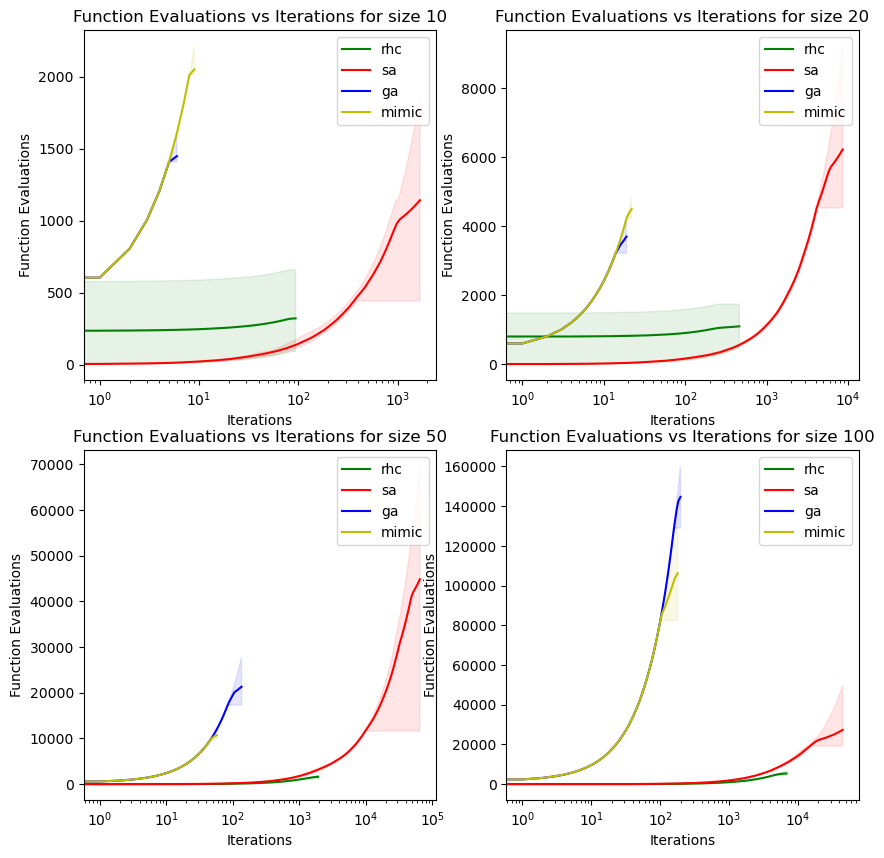

In [280]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for size,_ in zip([10,20,50,100],[(0,0),(0,1),(1,0),(1,1)]):
    
    mean_fevals_rhc = []
    max_fevals_rhc = []
    min_fevals_rhc = []

    length1 = len(fitness_curve_dic_rhc[(size,75)])
    length2 = len(fitness_curve_dic_rhc[(size,150)])
    length3 = len(fitness_curve_dic_rhc[(size,225)])
    length4 = len(fitness_curve_dic_rhc[(size,300)])
    length5 = len(fitness_curve_dic_rhc[(size,375)])

    l_rhc_min = min(length1,length2,length3,length4,length5)
    l_rhc_max = max(length1,length2,length3,length4,length5)

    for i in range(l_rhc_min):
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][1]
        
        mean_fevals_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))

    for i in range(l_rhc_min,l_rhc_max):
        
        fit_seed1 = fitness_curve_dic_rhc[(size,75)][i][1] if i < length1 else fitness_curve_dic_rhc[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_rhc[(size,150)][i][1] if i < length2 else fitness_curve_dic_rhc[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_rhc[(size,225)][i][1] if i < length3 else fitness_curve_dic_rhc[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_rhc[(size,300)][i][1] if i < length4 else fitness_curve_dic_rhc[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_rhc[(size,375)][i][1] if i < length5 else fitness_curve_dic_rhc[(size,375)][length5 - 1][1]
        
        mean_fevals_rhc.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_rhc.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_rhc.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    mean_fevals_sa = []
    max_fevals_sa = []
    min_fevals_sa = []

    length1 = len(fitness_curve_dic_sa[(size,75)])
    length2 = len(fitness_curve_dic_sa[(size,150)])
    length3 = len(fitness_curve_dic_sa[(size,225)])
    length4 = len(fitness_curve_dic_sa[(size,300)])
    length5 = len(fitness_curve_dic_sa[(size,375)])

    l_sa_min = min(length1,length2,length3,length4,length5)
    l_sa_max = max(length1,length2,length3,length4,length5)

    for i in range(l_sa_min):
        
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][1]
        

        mean_fevals_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_sa_min,l_sa_max):
        #generate fit_seed
        fit_seed1 = fitness_curve_dic_sa[(size,75)][i][1] if i < length1 else fitness_curve_dic_sa[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_sa[(size,150)][i][1] if i < length2 else fitness_curve_dic_sa[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_sa[(size,225)][i][1] if i < length3 else fitness_curve_dic_sa[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_sa[(size,300)][i][1] if i < length4 else fitness_curve_dic_sa[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_sa[(size,375)][i][1] if i < length5 else fitness_curve_dic_sa[(size,375)][length5 - 1][1]
        
        mean_fevals_sa.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_sa.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_sa.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))    
        
        
    mean_fevals_ga = []
    max_fevals_ga = []
    min_fevals_ga = []

    length1 = len(fitness_curve_dic_ga[(size,75)])
    length2 = len(fitness_curve_dic_ga[(size,150)])
    length3 = len(fitness_curve_dic_ga[(size,225)])
    length4 = len(fitness_curve_dic_ga[(size,300)])
    length5 = len(fitness_curve_dic_ga[(size,375)])

    l_ga_min = min(length1,length2,length3,length4,length5)
    l_ga_max = max(length1,length2,length3,length4,length5)

    for i in range(l_ga_min):
        
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][1]
        

        mean_fevals_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_ga_min,l_ga_max):
        #generate fit_seed
        fit_seed1 = fitness_curve_dic_ga[(size,75)][i][1] if i < length1 else fitness_curve_dic_ga[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_ga[(size,150)][i][1] if i < length2 else fitness_curve_dic_ga[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_ga[(size,225)][i][1] if i < length3 else fitness_curve_dic_ga[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_ga[(size,300)][i][1] if i < length4 else fitness_curve_dic_ga[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_ga[(size,375)][i][1] if i < length5 else fitness_curve_dic_ga[(size,375)][length5 - 1][1]
        
        mean_fevals_ga.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_ga.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_ga.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        

    mean_fevals_mimic = []
    max_fevals_mimic = []
    min_fevals_mimic = []

    length1 = len(fitness_curve_dic_mimic[(size,75)])
    length2 = len(fitness_curve_dic_mimic[(size,150)])
    length3 = len(fitness_curve_dic_mimic[(size,225)])
    length4 = len(fitness_curve_dic_mimic[(size,300)])
    length5 = len(fitness_curve_dic_mimic[(size,375)])

    l_mimic_min = min(length1,length2,length3,length4,length5)
    l_mimic_max = max(length1,length2,length3,length4,length5)

    for i in range(l_mimic_min):
        
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][1]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][1]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][1]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][1]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][1]
        

        mean_fevals_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    for i in range(l_mimic_min,l_mimic_max):
        #generate fit_seed
        fit_seed1 = fitness_curve_dic_mimic[(size,75)][i][1] if i < length1 else fitness_curve_dic_mimic[(size,75)][length1 - 1][1]
        fit_seed2 = fitness_curve_dic_mimic[(size,150)][i][1] if i < length2 else fitness_curve_dic_mimic[(size,150)][length2 - 1][1]
        fit_seed3 = fitness_curve_dic_mimic[(size,225)][i][1] if i < length3 else fitness_curve_dic_mimic[(size,225)][length3 - 1][1]
        fit_seed4 = fitness_curve_dic_mimic[(size,300)][i][1] if i < length4 else fitness_curve_dic_mimic[(size,300)][length4 - 1][1]
        fit_seed5 = fitness_curve_dic_mimic[(size,375)][i][1] if i < length5 else fitness_curve_dic_mimic[(size,375)][length5 - 1][1]
        
        mean_fevals_mimic.append(np.mean([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        max_fevals_mimic.append(np.max([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        min_fevals_mimic.append(np.min([fit_seed1,fit_seed2,fit_seed3,fit_seed4,fit_seed5]))
        
    ax[_].fill_between(range(l_rhc_max), min_fevals_rhc, max_fevals_rhc, alpha=0.1, color="g",)
    ax[_].plot(mean_fevals_rhc,color='g',label='rhc')
    
    ax[_].fill_between(range(l_sa_max), min_fevals_sa, max_fevals_sa, alpha=0.1, color="r",)
    ax[_].plot(mean_fevals_sa,color='r',label='sa')
    
    ax[_].fill_between(range(l_ga_max), min_fevals_ga, max_fevals_ga, alpha=0.1, color="b",)
    ax[_].plot(mean_fevals_ga,color='b',label='ga')
    
    ax[_].fill_between(range(l_mimic_max), min_fevals_mimic, max_fevals_mimic, alpha=0.1, color="y",)
    ax[_].plot(mean_fevals_mimic,color='y',label='mimic')
    
    ax[_].legend(loc='best')
    ax[_].set_xlabel('Iterations')
    ax[_].set_ylabel('Function Evaluations')
    ax[_].set_title('Function Evaluations vs Iterations for size {}'.format(size))
    #log scale y axis
    ax[_].set_xscale('log')
    
plt.show()

In [281]:
for s in [10,20,50,100]:
    print('size : ',s,'\n')
    print('RHC mean time :',np.mean(time_list_rhc[s]))
    print('SA mean time :',np.mean(time_list_sa[s]))
    print('GA mean time :',np.mean(time_list_ga[s]))
    print('MIMIC mean time :',np.mean(time_list_mimic[s]))
    print('\n')

size :  10 

RHC mean time : 0.0052564144134521484
SA mean time : 0.008410406112670899
GA mean time : 0.020823192596435548
MIMIC mean time : 0.01497821807861328


size :  20 

RHC mean time : 0.012814998626708984
SA mean time : 0.03442859649658203
GA mean time : 0.05535521507263184
MIMIC mean time : 0.05291285514831543


size :  50 

RHC mean time : 0.07197470664978027
SA mean time : 0.31839704513549805
GA mean time : 0.35732440948486327
MIMIC mean time : 0.4699537754058838


size :  100 

RHC mean time : 0.31120591163635253
SA mean time : 0.19873199462890626
GA mean time : 3.206593465805054
MIMIC mean time : 14.946074390411377


